# 환경데이터 Merge

In [1]:
import pandas as pd
import os,glob
columns=['tm','serial','flag','pm10','co2','vocs','noise','temp','humi','pm25']
folder_path = 'C:\\Users\\pj903\\bigCon\\환경기상데이터\\노원구'
df_empty=pd.DataFrame(columns=columns)
tmp_list = []
for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data=pd.read_csv(file_name, engine='python')
    data = data.drop(labels='Unnamed: 10', axis=1)
    columnsOFdf = data.columns
    for column in columns :
        if column not in columnsOFdf :
            data[column] = [""] * data.shape[0]
    #file_name_noext = file_name.replace(".csv","") # in order to remove the .xls part
    #data['파일명'] = [file_name[34:45]] * data.shape[0]
    tmp_list.append(data)
result1 = pd.concat(tmp_list)
result1['지역'] = '노원구'

In [2]:
import pandas as pd
import os,glob
columns=['tm','serial','flag','pm10','co2','vocs','noise','temp','humi','pm25']
folder_path = 'C:\\Users\\pj903\\bigCon\\환경기상데이터\\종로구'
df_empty=pd.DataFrame(columns=columns)
tmp_list = []
for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data=pd.read_csv(file_name, engine='python')
    data = data.drop(labels='Unnamed: 10', axis=1)
    columnsOFdf = data.columns
    for column in columns :
        if column not in columnsOFdf :
            data[column] = [""] * data.shape[0]
    #file_name_noext = file_name.replace(".csv","") # in order to remove the .xls part
    #data['파일명'] = [file_name[34:45]] * data.shape[0]
    tmp_list.append(data)
result2 = pd.concat(tmp_list)
result2['지역'] = '종로구'
result1.to_csv('노원구환경.csv',index=False)

In [5]:
result1.to_csv('노원구환경.csv',index=False,encoding='ms949')

In [6]:
result2.to_csv('종로구환경.csv',index=False,encoding='ms949')

# 분단위 -> 날짜단위로

In [17]:
result1.head()

,tm,serial,flag,pm10,co2,vocs,noise,temp,humi,pm25,지역
0,201805070000,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN,노원구
1,201805070001,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN,노원구
2,201805070002,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN,노원구
3,201805070003,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN,노원구
4,201805070004,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN,노원구


In [18]:
result11 = result1.reset_index()

In [70]:
def make_date(tm):
    return(str(tm)[0:8])
result11['OPER_DT'] = result11['tm'].apply(lambda x: make_date(x))

In [71]:
result11_pm25 = result11.groupby('OPER_DT', as_index=False)['pm25'].mean()
result11_pm10 = result11.groupby('OPER_DT', as_index=False)['pm10'].mean()

In [74]:
final_no = pd.concat([result11_pm25,result11_pm10.drop('OPER_DT',axis=1)],axis=1)

In [67]:
final_no.to_csv('노원구환경_mean.csv',index=False,encoding='ms949')

# 유통데이터와 Merge

In [164]:
import pandas as pd
distr = pd.read_excel('C:\\Users\\pj903\\bigCon\\유통데이터\\GS리테일_동별 매출지수용 기준값 확인_AMT_NEW.xlsx',sheet_name='종합테이블')
env_no=pd.read_csv('C:\\Users\\pj903\\bigCon\\노원구환경_mean.csv', engine='python')
env_no['지역'] = '노원구'
env_no.columns = ['OPER_DT', 'pm25','pm10','지역']
env_jong=pd.read_csv('C:\\Users\\pj903\\bigCon\\종로구환경_mean.csv', engine='python')
env_jong['지역'] = '종로구'
env_jong.columns = ['OPER_DT', 'pm25','pm10','지역']

In [165]:
distr.head()

,OPER_DT,BOR_CD,ADMD_CD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20180401,1111,11110515,0.736933,0.279018,0.299569,0.334816,0.015636,0.053782,0.000265,0.013092,0.003823
1,20180401,1111,11110530,1.258473,0.237403,0.257984,0.349826,0.045502,0.092581,0.004988,0.002467,0.009250
2,20180401,1111,11110540,0.674164,0.254081,0.246844,0.324434,0.065025,0.089691,NaN,0.013212,0.006712
3,20180401,1111,11110550,1.010874,0.416368,0.217715,0.282613,0.026738,0.036622,0.005893,0.012295,0.001756
4,20180401,1111,11110560,1.012942,0.311321,0.267387,0.262358,0.014736,0.135350,NaN,0.007270,0.001577


In [166]:
distr_jong = distr.loc[distr['BOR_CD'] == 1111,:]
distr_jong = distr_jong.drop('ADMD_CD',axis=1)

In [167]:
distr_jong = distr_jong.groupby('OPER_DT', as_index=False)[['LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P']].mean()

In [168]:
data_jong = pd.concat([distr_jong,env_jong],axis=1)

In [169]:
data_jong[['LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P','pm25','pm10']].corr()

,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm25,pm10
LCLS_10_P,1.000000,-0.473493,-0.495464,0.422249,-0.091230,-0.106712,-0.097749,-0.539530,0.019207,0.062598
LCLS_20_P,-0.473493,1.000000,-0.263089,-0.093023,-0.074880,0.060022,0.125168,0.343861,0.102538,0.063672
LCLS_30_P,-0.495464,-0.263089,1.000000,-0.317536,-0.505532,-0.044483,-0.093848,0.140173,-0.105888,-0.078327
LCLS_40_P,0.422249,-0.093023,-0.317536,1.000000,-0.189961,0.038961,0.073073,-0.198188,0.109947,0.044420
LCLS_50_P,-0.091230,-0.074880,-0.505532,-0.189961,1.000000,0.003638,-0.001704,0.073335,-0.011028,-0.054034
LCLS_60_P,-0.106712,0.060022,-0.044483,0.038961,0.003638,1.000000,0.155418,0.296825,-0.018369,0.033609
LCLS_70_P,-0.097749,0.125168,-0.093848,0.073073,-0.001704,0.155418,1.000000,0.228296,0.118192,0.062171
LCLS_80_P,-0.539530,0.343861,0.140173,-0.198188,0.073335,0.296825,0.228296,1.000000,0.031842,0.083405
pm25,0.019207,0.102538,-0.105888,0.109947,-0.011028,-0.018369,0.118192,0.031842,1.000000,0.772993
pm10,0.062598,0.063672,-0.078327,0.044420,-0.054034,0.033609,0.062171,0.083405,0.772993,1.000000


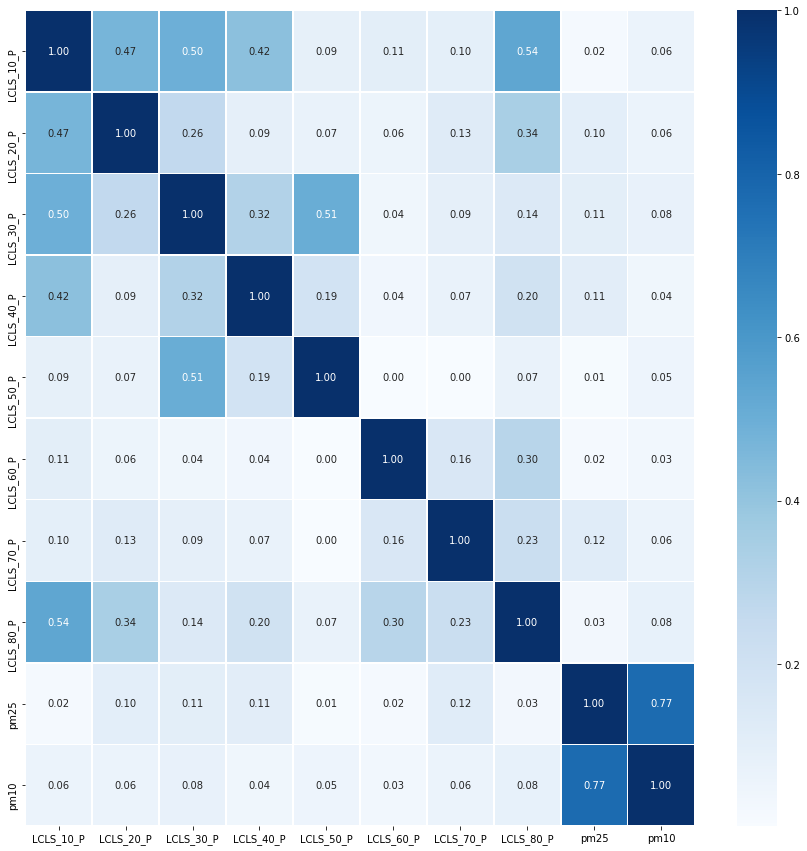

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(15,15))
sns.heatmap(data = np.abs(data_jong[['LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P','pm25','pm10']].corr()), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 매출변화 예측 데이터 만들기

In [171]:
data_jong

,OPER_DT,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,OPER_DT,pm25,pm10,지역
0,20180401,0.295285,0.231812,0.347819,0.032291,0.064262,0.008792,0.016505,0.005084,20180401,30.679840,29.294534,종로구
1,20180402,0.307272,0.194870,0.379447,0.035459,0.059767,0.008899,0.013682,0.003378,20180402,24.875278,28.751210,종로구
2,20180403,0.312559,0.199487,0.370289,0.039451,0.058583,0.007031,0.011937,0.002158,20180403,18.738203,27.359431,종로구
3,20180404,0.320409,0.191137,0.345326,0.036982,0.076563,0.009270,0.019547,0.002551,20180404,2.175654,-21.926098,종로구
4,20180405,0.343531,0.203349,0.302264,0.025693,0.103983,0.009497,0.012005,0.003267,20180405,3.391605,-26.370923,종로구
5,20180406,0.328787,0.203885,0.329389,0.037259,0.079278,0.007084,0.014172,0.002647,20180406,12.161074,32.894064,종로구
6,20180407,0.298945,0.231988,0.336187,0.033004,0.072676,0.008348,0.016310,0.003500,20180407,19.946914,10.792159,종로구
7,20180408,0.288896,0.207844,0.269024,0.034343,0.177034,0.006641,0.014925,0.004231,20180408,14.556750,-3.592249,종로구
8,20180409,0.339651,0.198304,0.341227,0.040370,0.056860,0.005591,0.016401,0.003508,20180409,27.868171,9.138956,종로구
9,20180410,0.309810,0.194697,0.336548,0.031325,0.106739,0.007846,0.013549,0.002837,20180410,22.269411,10.378651,종로구
